### Data Analysis

- **How many rows**: Number of roows in the dataset.
- **How many columns**: Number of columns in the dataset.
- **List of the columns**: List of columns in the dataset.
- **Total Products**: Number of products in the dataset.
- **Distinct Products**: Number of unique products.
- **Total Transactions**: Number of transactions recorded.
- **Total Customers**: Number of customers in the dataset.
- **Distinct Categories**: Number of unique product categories.


In [1]:
# ===== DATA ANALYSIS =====

import pandas as pd
import os



BACKGROUND_COLOR = "#f5f5f5"  # Light gray background
TEXT_COLOR = "#333333"  # Dark gray for text



path = r'C:\Users\moham\Apriori_VS_Word2Vec\Dataset'
excel_file = 'df_merged_items_category.xlsx'
excel_file_path = os.path.join(path, excel_file)

# Load the dataset
df = pd.read_excel(excel_file_path)
print("\n ===== DATA ANALYSIS ===== \n")

# Create plot directory
plots_dir = os.path.join(path, 'Analysis_plots')
if not os.path.exists(plots_dir):
    os.makedirs(plots_dir)
# Calculate basic dataset statistics
num_rows = len(df)
num_columns = len(df.columns)
column_list = df.columns.tolist()
total_products = len(df)  # Each row represents a product purchase
distinct_products = df['Itemname'].nunique()
total_transactions = df['BillNo'].nunique()
total_customers = df['CustomerID'].dropna().nunique()  # Drop NaN values before counting
distinct_categories = df['category'].nunique()

# Display the results with nice formatting
print(f" Dataset Overview:")
print(f"{'='*50}")
print(f"  Rows: {num_rows:,}")
print(f"  Columns: {num_columns}")
print(f"  Column Names: {', '.join(column_list)}")
print(f"{'='*50}")
print(f"  Total Products: {total_products:,}")
print(f"  Distinct Products: {distinct_products:,}")
print(f"  Total Transactions: {total_transactions:,}")
print(f"  Total Customers: {int(total_customers):,}")
print(f"  Distinct Categories: {distinct_categories}")
print(f"{'='*50}")




 ===== DATA ANALYSIS ===== 

 Dataset Overview:
  Rows: 520,609
  Columns: 8
  Column Names: BillNo, Itemname, Quantity, Date, Price, CustomerID, Country, category
  Total Products: 520,609
  Distinct Products: 4,185
  Total Transactions: 20,208
  Total Customers: 4,297
  Distinct Categories: 21


In [10]:
# DataFrame with distinct products and their categories
distinct_products_df = df[['Itemname', 'category']].drop_duplicates().reset_index(drop=True)

# Sort by category and then by product name for better organization
distinct_products_df = distinct_products_df.sort_values(['category', 'Itemname'])

# Save to Excel file
output_file = os.path.join(path, 'distinct_products_with_categories.xlsx')
distinct_products_df.to_excel(output_file, index=False)

print(f"Excel file saved to: {output_file}")



Excel file saved to: C:\Users\moham\Apriori_VS_Word2Vec\Dataset\distinct_products_with_categories.xlsx


### Transaction Patterns

Analyze the purchasing patterns visible in the data:

- **Average items per transaction**.
- **Distribution of transaction sizes**: Histogram showing the number of items per invoice.



 ===== TRANSACTION PATTERNS ANALYSIS ===== 

 Average Items per Transaction
 Average Items: 25.76
 Median Items: 15.0
⬇ Min Items: 1
⬆ Max Items: 1114

 Transaction Size Percentiles:
25th percentile: 5.0 items
50th percentile (median): 15.0 items
75th percentile: 28.0 items
90th percentile: 53.0 items
95th percentile: 77.0 items
99th percentile: 218.0 items

 Transaction Size Distribution:
1-4: 2838 transactions (14.04%)
5-9: 2922 transactions (14.46%)
10-14: 2562 transactions (12.68%)
15-19: 2305 transactions (11.41%)
20-29: 2795 transactions (13.83%)
30-49: 2367 transactions (11.71%)
50-99: 1533 transactions (7.59%)
100+: 662 transactions (3.28%)


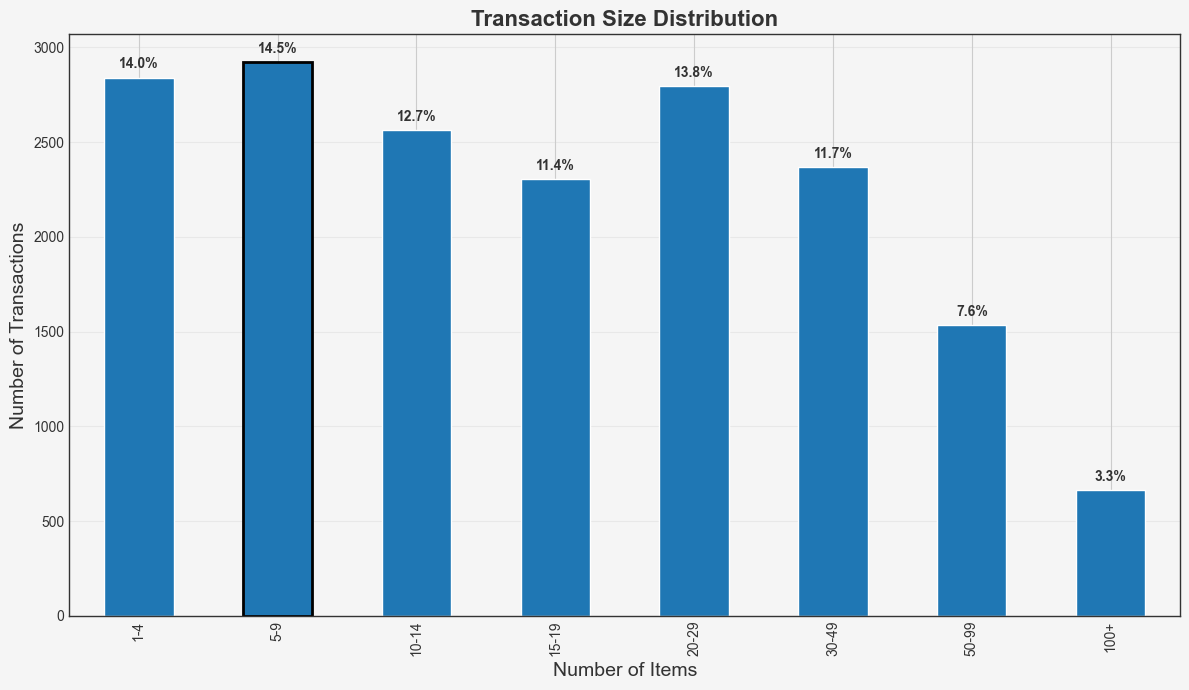

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns


# Define a consistent color palette to use across all visualizations
# Using a professional blue-based color scheme
MAIN_COLOR = "#1f77b4"  # Primary blue

TERTIARY_COLOR = "#2ca02c"  # Green for additional elements
BACKGROUND_COLOR = "#f5f5f5"  # Light gray background
TEXT_COLOR = "#333333"  # Dark gray for text

# Set modern styling with consistent colors
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette([MAIN_COLOR, TERTIARY_COLOR])
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial', 'Helvetica', 'DejaVu Sans']
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['axes.facecolor'] = BACKGROUND_COLOR
plt.rcParams['axes.edgecolor'] = TEXT_COLOR
plt.rcParams['axes.labelcolor'] = TEXT_COLOR
plt.rcParams['text.color'] = TEXT_COLOR
plt.rcParams['xtick.color'] = TEXT_COLOR
plt.rcParams['ytick.color'] = TEXT_COLOR

path = r'C:\Users\moham\Apriori_VS_Word2Vec\Dataset'
excel_file = 'df_merged_items_category.xlsx'
excel_file_path = os.path.join(path, excel_file)

# Load the dataset
df = pd.read_excel(excel_file_path)

# Ensure Date is in datetime format
if 'Date' in df.columns:
    if not pd.api.types.is_datetime64_any_dtype(df['Date']):
        df['Date'] = pd.to_datetime(df['Date'])



# ===== TRANSACTION PATTERNS ANALYSIS =====
print("\n ===== TRANSACTION PATTERNS ANALYSIS ===== \n")

# 1. Average items per transaction
print(" Average Items per Transaction")
# Count items per transaction
items_per_transaction = df.groupby('BillNo').size()
avg_items = items_per_transaction.mean()
median_items = items_per_transaction.median()
min_items = items_per_transaction.min()
max_items = items_per_transaction.max()

# Create a stylish display
print(f" Average Items: {avg_items:.2f}")
print(f" Median Items: {median_items}")
print(f"⬇ Min Items: {min_items}")
print(f"⬆ Max Items: {max_items}")
print("=" * 50)

# 2. Distribution of transaction sizes

# Calculate percentiles
percentiles = np.percentile(items_per_transaction, [25, 50, 75, 90, 95, 99])
print("\n Transaction Size Percentiles:")
print(f"25th percentile: {percentiles[0]:.1f} items")
print(f"50th percentile (median): {percentiles[1]:.1f} items")
print(f"75th percentile: {percentiles[2]:.1f} items")
print(f"90th percentile: {percentiles[3]:.1f} items")
print(f"95th percentile: {percentiles[4]:.1f} items")
print(f"99th percentile: {percentiles[5]:.1f} items")
print("=" * 50)

# Transaction size distribution (in bins)
size_bins = [1, 5, 10, 15, 20, 30, 50, 100, np.inf]
size_labels = ['1-4', '5-9', '10-14', '15-19', '20-29', '30-49', '50-99', '100+']
transaction_size_binned = pd.cut(items_per_transaction, bins=size_bins, labels=size_labels)
size_counts = transaction_size_binned.value_counts().sort_index()

print("\n Transaction Size Distribution:")
total_transactions = len(items_per_transaction)
for size, count in size_counts.items():
    percentage = (count / total_transactions) * 100
    print(f"{size}: {count} transactions ({percentage:.2f}%)")

# Plot binned transaction sizes with consistent styling
plt.figure(figsize=(12, 7), facecolor=BACKGROUND_COLOR)
ax = size_counts.plot(kind='bar', color=MAIN_COLOR, edgecolor='white')
plt.title('Transaction Size Distribution', fontweight='bold', fontsize=16, color=TEXT_COLOR)
plt.xlabel('Number of Items', fontsize=14, color=TEXT_COLOR)
plt.ylabel('Number of Transactions', fontsize=14, color=TEXT_COLOR)

# Add count and percentage annotations on top of each bar
for i, v in enumerate(size_counts):
    percentage = (v / total_transactions) * 100
    ax.text(i, v + 50, f"{percentage:.1f}%", ha='center', fontsize=10, 
            fontweight='bold', color=TEXT_COLOR)

# Add a light box around key values
max_size_category = size_counts.idxmax()
max_idx = size_counts.index.get_loc(max_size_category)
ax.get_children()[max_idx].set_edgecolor('black')
ax.get_children()[max_idx].set_linewidth(2)

plt.grid(axis='y', alpha=0.3, color="#cccccc")
plt.tight_layout()
plt.savefig(os.path.join(plots_dir, 'transaction_size_bins.png'), dpi=300)
plt.show()


### Products Analysis

Examine the product-related characteristics:

- **Top 10-20 most frequently purchased products**.
- **Product category distribution**: Percentage of items in each category.



 ===== PRODUCT ANALYSIS ===== 



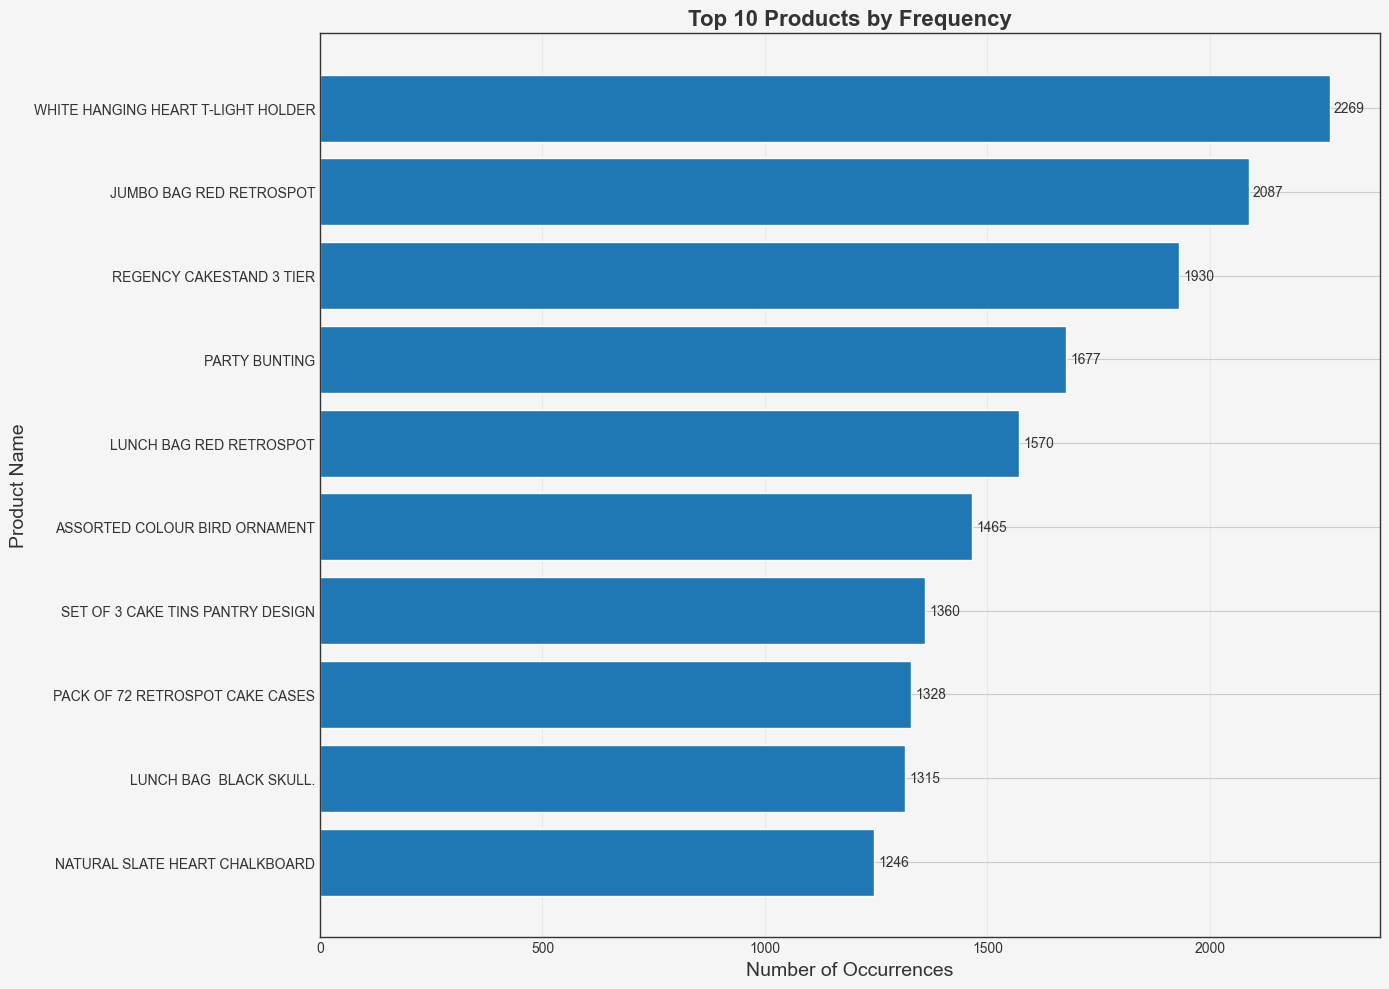

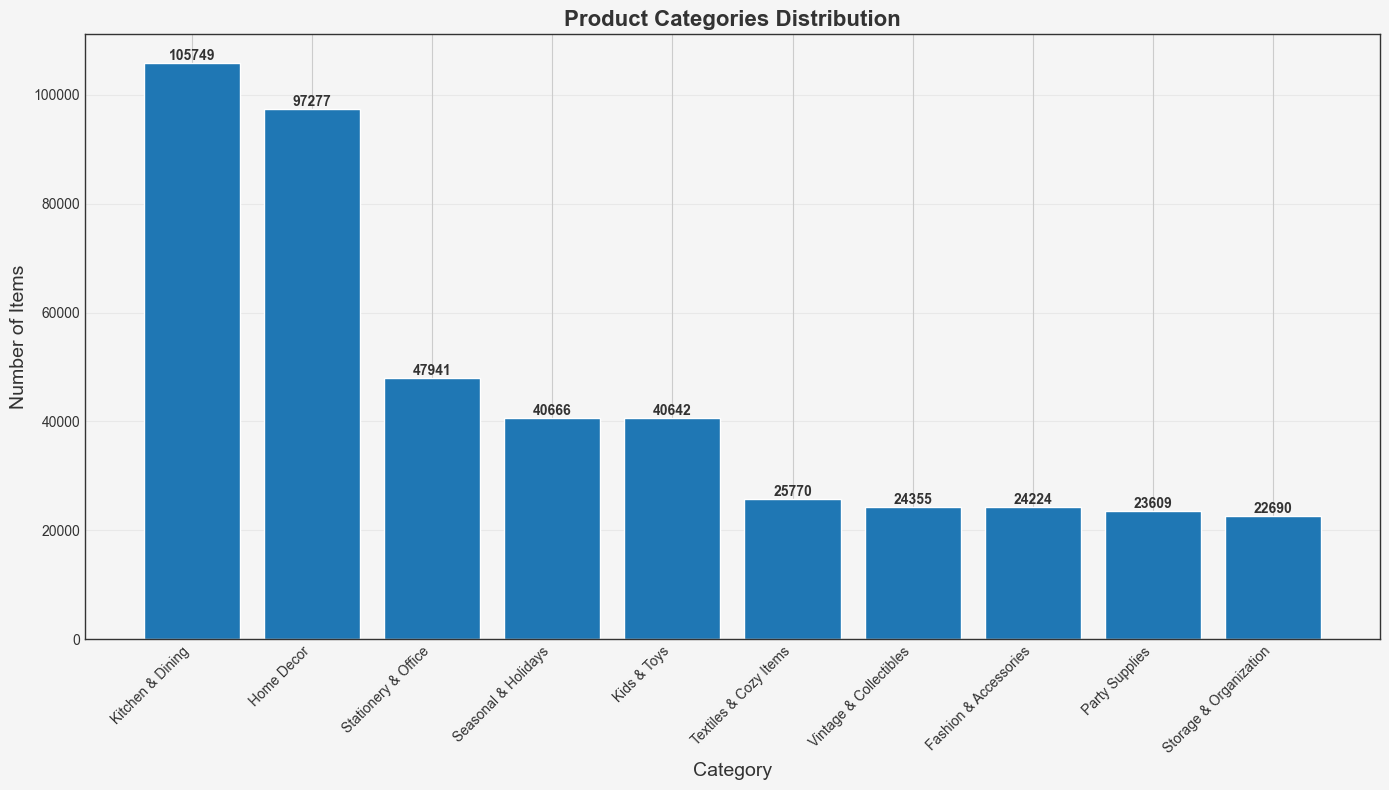

In [9]:


# ===== PRODUCT ANALYSIS =====
print("\n ===== PRODUCT ANALYSIS ===== \n")

# Top products by frequency
top_products = df['Itemname'].value_counts().head(10)
total_items = len(df)

# Plot top products
plt.figure(figsize=(14, 10), facecolor=BACKGROUND_COLOR)
bars = plt.barh(top_products.index[::-1], top_products.values[::-1], color=MAIN_COLOR, edgecolor='white')
plt.title('Top 10 Products by Frequency', fontweight='bold', fontsize=16, color=TEXT_COLOR)
plt.xlabel('Number of Occurrences', fontsize=14, color=TEXT_COLOR)
plt.ylabel('Product Name', fontsize=14, color=TEXT_COLOR)

# Add count annotations
for i, bar in enumerate(bars):
    value = top_products.values[::-1][i]
    plt.text(value + 10, bar.get_y() + bar.get_height()/2, 
             f"{value}", va='center', fontsize=10, color=TEXT_COLOR)


plt.grid(axis='x', alpha=0.3, color="#cccccc")
plt.tight_layout()
plt.savefig(os.path.join(plots_dir, 'top_products.png'), dpi=300)
plt.show()

# Product category analysis 
if 'category' in df.columns:
    # Category distribution
    category_counts = df['category'].value_counts().head(10)
    total_items = len(df)

    plt.figure(figsize=(14, 8), facecolor=BACKGROUND_COLOR)
    bars = plt.bar(category_counts.index, category_counts.values, color=MAIN_COLOR, edgecolor='white')
    plt.title('Product Categories Distribution', fontweight='bold', fontsize=16, color=TEXT_COLOR)
    plt.xlabel('Category', fontsize=14, color=TEXT_COLOR)
    plt.ylabel('Number of Items', fontsize=14, color=TEXT_COLOR)
    plt.xticks(rotation=45, ha='right', color=TEXT_COLOR)
    
    # Add value annotations on top of each bar
    for i, bar in enumerate(bars):
        value = category_counts.values[i]
        plt.text(bar.get_x() + bar.get_width()/2, value + 5, 
            f"{value}", ha='center', va='bottom', 
            fontsize=10, color=TEXT_COLOR, fontweight='bold')
    
    plt.grid(axis='y', alpha=0.3, color="#cccccc")
    plt.tight_layout()
    plt.savefig(os.path.join(plots_dir, 'category_distribution.png'), dpi=300)
    plt.show()
